In [1]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

In [2]:
def create_dataset(hm, variance, step=2, correlation=False):
    
    val = 1
    ys = []
    
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
            
    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

In [3]:
def best_fit_slope_and_intercept(xs, ys):
    
    m = (((mean(xs) * mean(ys)) - mean(xs * ys)) / 
         ((mean(xs)**2) - mean(xs**2)))
    
    b = mean(ys) - m * mean(xs)
    
    return m, b


def squared_error(ys_orig, ys_line):
    
    return sum((ys_line - ys_orig)**2)


def coefficient_of_determination(ys_orig, ys_line):
    
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    
    return 1 - (squared_error_regr / squared_error_y_mean)

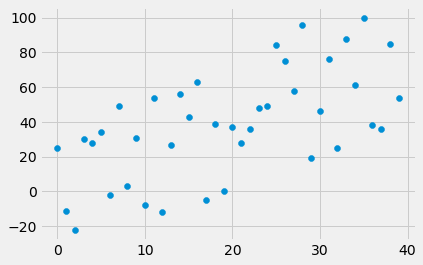

In [4]:
xs, ys = create_dataset(40, 40, 2, correlation='pos')

style.use('fivethirtyeight')
plt.scatter(xs, ys)
plt.show()

In [5]:
m, b = best_fit_slope_and_intercept(xs, ys)
print(m, b)

1.61191369606 7.59268292683


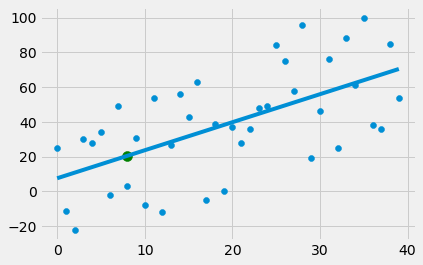

In [6]:
regression_line = [((m * x) + b) for x in xs]

predict_x = 8
predict_y = (m * predict_x) + b
plt.scatter(predict_x, predict_y, color='g', s=100)

plt.scatter(xs, ys)
plt.plot(xs, regression_line)
plt.show()

In [7]:
r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

0.369113402477
